# EDA

Create your own EDA below/ Create as many code-blocks as you need.

Once you've completed your EDA, complete the section titled **Reflections** where you will answer questions about your EDA.

**Note**: Since this dataset is large, visualizations might load slower. You may want to consider using the `sample()` method if this dataset is too large for your computer to process in a reasonable amount of time.

In [3]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# import data 
transactions = pd.read_csv("../data/bank_transactions.csv")

transactions.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,983.09,C1454812978,36730.24,35747.15,M1491308340,0.00,0.00,0,0
1,PAYMENT,55215.25,C1031766358,99414.00,44198.75,M2102868029,0.00,0.00,0,0
2,CASH_IN,220986.01,C1451868666,7773074.97,7994060.98,C1339195526,924031.48,703045.48,0,0
3,TRANSFER,2357394.75,C458368123,0.00,0.00,C620979654,4202580.45,6559975.19,0,0
4,CASH_OUT,67990.14,C1098978063,0.00,0.00,C142246322,625317.04,693307.19,0,0


In [5]:
# TODO: view the shape of your data
transactions.shape

(1000000, 10)

In [6]:
# TODO: Begin your EDA
transactions.isnull().sum()

type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
transactions.info

<bound method DataFrame.info of             type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0        PAYMENT      983.09  C1454812978       36730.24        35747.15   
1        PAYMENT    55215.25  C1031766358       99414.00        44198.75   
2        CASH_IN   220986.01  C1451868666     7773074.97      7994060.98   
3       TRANSFER  2357394.75   C458368123           0.00            0.00   
4       CASH_OUT    67990.14  C1098978063           0.00            0.00   
...          ...         ...          ...            ...             ...   
999995   PAYMENT    13606.07   C768838592      114122.11       100516.04   
999996   PAYMENT     9139.61  C1912748675           0.00            0.00   
999997  CASH_OUT   153650.41  C1494179549       50677.00            0.00   
999998  CASH_OUT   163810.52   C116856975           0.00            0.00   
999999  CASH_OUT    51379.41  C2103541974       45503.43            0.00   

           nameDest  oldbalanceDest  newbalanceDest  is

In [9]:
transactions.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [11]:
transactions['type'].value_counts()

type
CASH_OUT    351360
PAYMENT     338573
CASH_IN     219955
TRANSFER     83695
DEBIT         6417
Name: count, dtype: int64

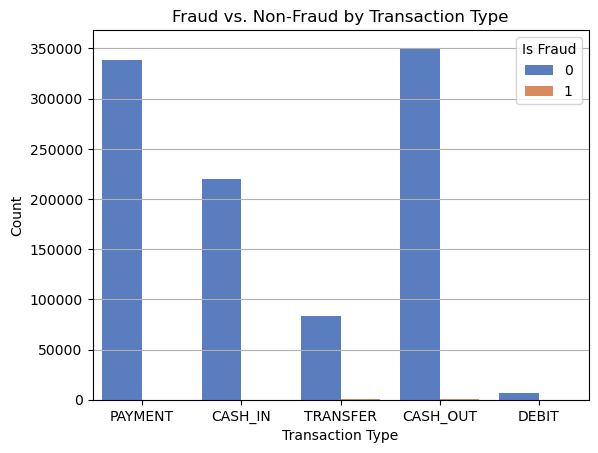

In [14]:
sns.countplot(x='type', hue='isFraud', data=transactions, palette='muted')
plt.title('Fraud vs. Non-Fraud by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.grid(axis='y')
plt.show()

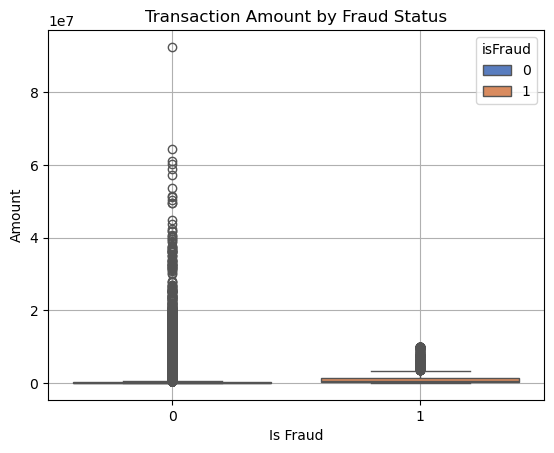

In [18]:
sns.boxplot(x='isFraud', y='amount', hue='isFraud', data=transactions, palette='muted')
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('Is Fraud')
plt.ylabel('Amount')
plt.grid()
plt.show()

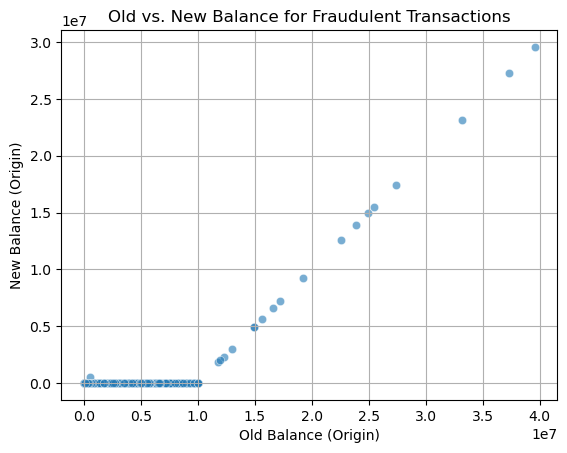

In [19]:
fraud_df = transactions[transactions['isFraud'] == 1]

sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', data=fraud_df, alpha=0.6)
plt.title('Old vs. New Balance for Fraudulent Transactions')
plt.xlabel('Old Balance (Origin)')
plt.ylabel('New Balance (Origin)')
plt.grid()
plt.show()

## Reflections

Answer each question based on the visualizations that you've generated.

Remember, you must justify your answers with proof.

### Q1

Take a closer look at the numeric features in your dataset. How are these values distributed and what might this tell you about how most transactions behave compared to a few **rare** ones?

**Hint**: Consider using visualizations that highlight frequency across value ranges.

Answer here

### Q2

When comparing different numerical features against one another, do any interesting patterns emerge for transactions marked as fraudulent? Are there particular regions or ranges where these transactions seem to concentrate?

**Hint**: Try comparing two numeric features at a time while distinguishing between fraud and non-fraud. Use visual cues to spot clusters or anomalies.

Answer here

### Q3

How do types of transaction relate to the typical amounts involved? Are some types of transactions consistently larger or smaller than others?

**Hint**: Break the dataset down by transaction type and compare summary statistics.

### Q4

Do transaction amounts vary when you compare fraudulent and non-fraudulent transactions across different transaction types? What patterns emerge when you look at both fraud status and transaction type together?

**Hint**:  Try summarizing average transaction amounts by both fraud label and transaction type to compare across categories.

Answer here

## Q5

Consider how well the system's built-in fraud flag (`isFlaggedFraud`) aligns with actual fraudulent activity. Are there mismatches? What does this tell you about the system's current performance?

**Hint**: Try organizing the data in a way that shows how often flagged transactions are truly fraudulent and how often fraud goes unflagged.

Answer here